## Dimensionality reduction with PCA

Principal component analysis, or PCA, is a common approach to dimensionality reduction. Learn exactly what PCA does, visualize the results of PCA with biplots and scree plots, and deal with practical issues such as centering and scaling the data before performing PCA.

### PCA using prcomp()
In this exercise, you will create your first PCA model and observe the diagnostic results.

We have loaded the Pokemon data from earlier, which has four dimensions, and placed it in a variable called pokemon. Your task is to create a PCA model of the data, then to inspect the resulting model using the summary() function.

In [1]:
library(dplyr)
pokemon = read.csv("Pokemon.csv")

pokemonToAnalysis <- pokemon %>%
    select(HitPoints, Attack, Defense, SpecialAttack, SpecialDefense, Speed)

# Perform scaled PCA: pr.out
pr.out = prcomp(pokemonToAnalysis, scale = TRUE)

# Inspect model output
summary(pr.out)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6
Standard deviation     1.6466 1.0457 0.8825 0.8489 0.65463 0.51681
Proportion of Variance 0.4519 0.1822 0.1298 0.1201 0.07142 0.04451
Cumulative Proportion  0.4519 0.6342 0.7640 0.8841 0.95549 1.00000

### Interpreting biplots (1)
As stated in the video, the biplot() function plots both the principal components loadings and the mapping of the observations to their first two principal component values. The next couple of exercises will check your interpretation of the biplot() visualization.

Using the biplot() of the pr.out model, which two original variables have approximately the same loadings in the first two principal components?

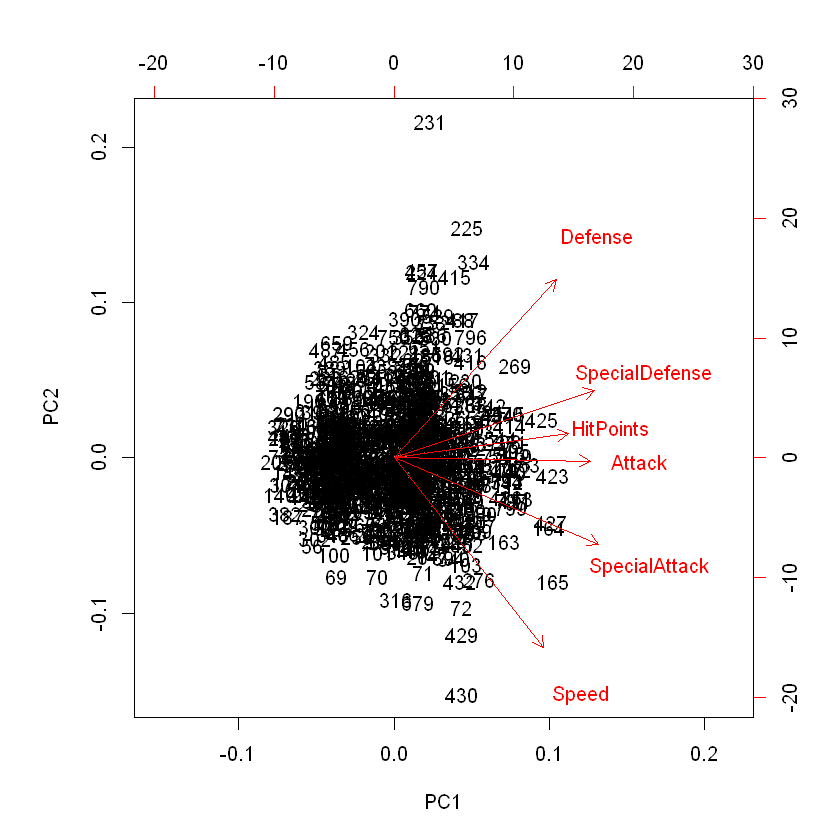

In [2]:
biplot(pr.out)

### Variance explained
The second common plot type for understanding PCA models is a scree plot. A scree plot shows the variance explained as the number of principal components increases. Sometimes the cumulative variance explained is plotted as well.

In this and the next exercise, you will prepare data from the pr.out model you created at the beginning of the chapter for use in a scree plot. Preparing the data for plotting is required because there is not a built-in function in R to create this type of plot.

In [6]:
# Variability of each principal component: pr.var
pr.var <- (pr.out$sdev)^2 

# Variance explained by each principal component: pve
pve <- pr.var / sum(pr.var)

pve

cumsum(pve)

[1] 0.45190665 0.18225358 0.12979086 0.12011089 0.07142337 0.04451466

[1] 0.4519067 0.6341602 0.7639511 0.8840620 0.9554853 1.0000000

### Visualize variance explained
Now you will create a scree plot showing the proportion of variance explained by each principal component, as well as the cumulative proportion of variance explained.

Recall from the video that these plots can help to determine the number of principal components to retain. One way to determine the number of principal components to retain is by looking for an elbow in the scree plot showing that as the number of principal components increases, the rate at which variance is explained decreases substantially. In the absence of a clear elbow, you can use the scree plot as a guide for setting a threshold.

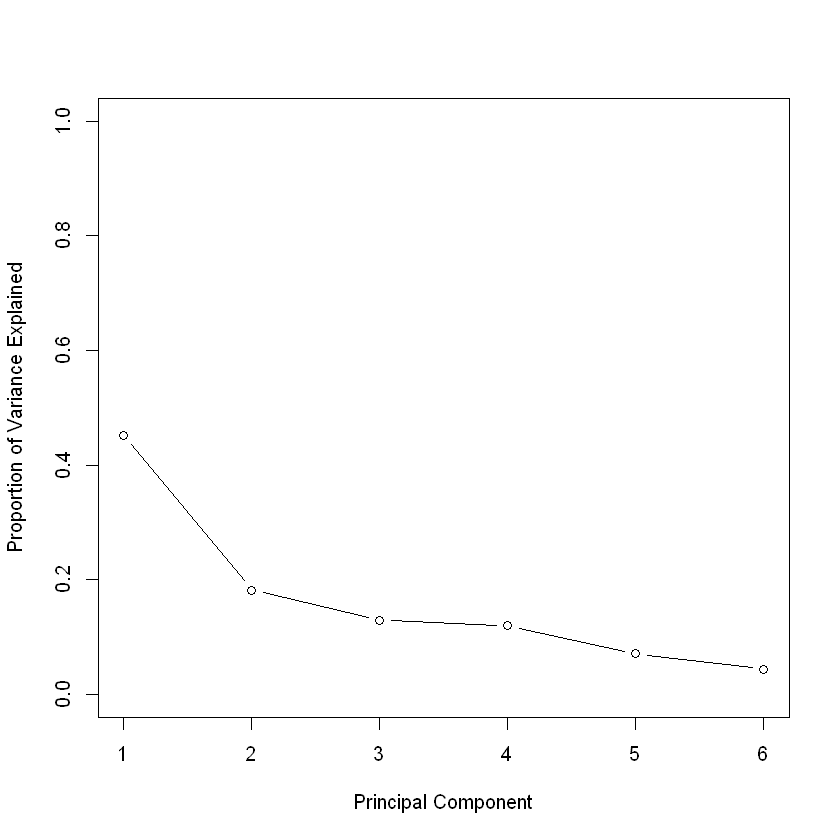

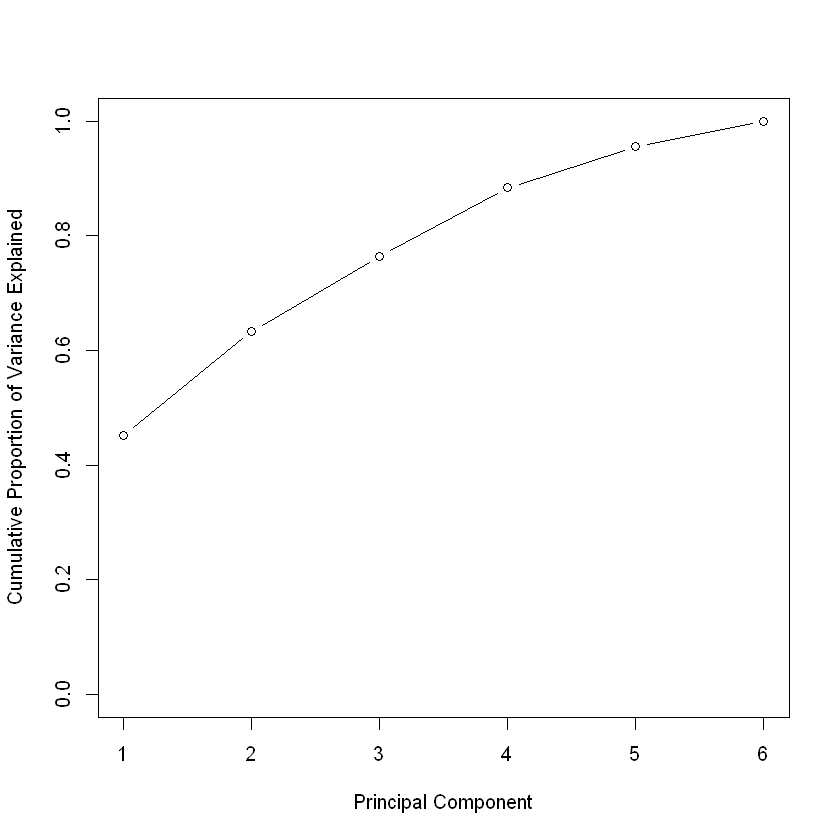

In [7]:
# Plot variance explained for each principal component
plot(pve, xlab = "Principal Component",
     ylab = "Proportion of Variance Explained",
     ylim = c(0, 1), type = "b")

# Plot cumulative proportion of variance explained
plot(cumsum(pve), xlab = "Principal Component",
     ylab = "Cumulative Proportion of Variance Explained",
     ylim = c(0, 1), type = "b")

### Practical issues: scaling
You saw in the video that scaling your data before doing PCA changes the results of the PCA modeling. Here, you will perform PCA with and without scaling, then visualize the results using biplots.

Sometimes scaling is appropriate when the variances of the variables are substantially different. This is commonly the case when variables have different units of measurement, for example, degrees Fahrenheit (temperature) and miles (distance). Making the decision to use scaling is an important step in performing a principal component analysis.

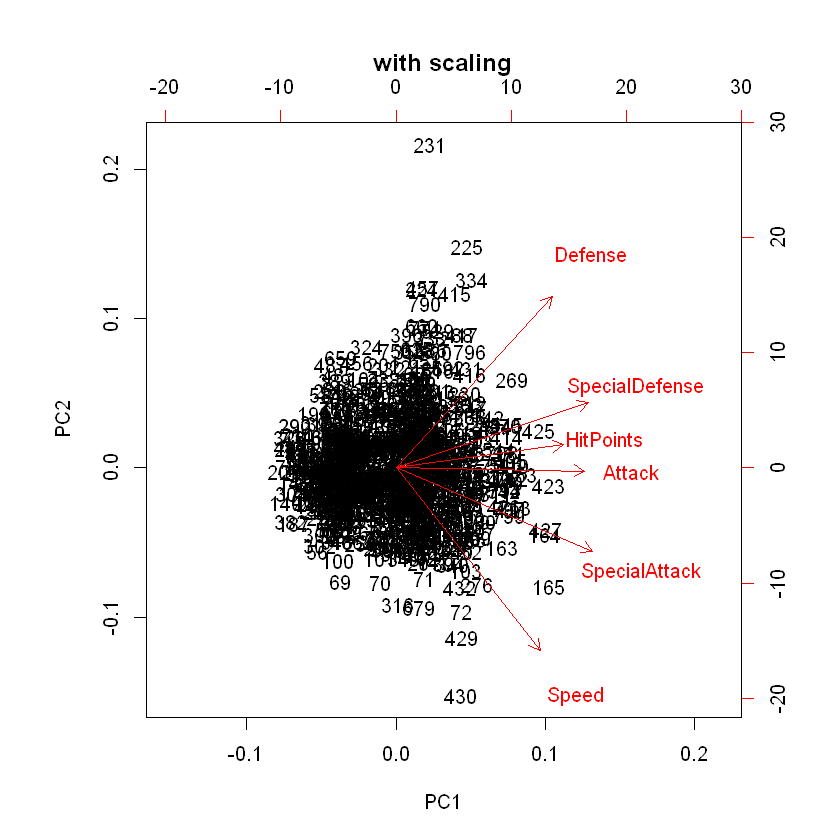

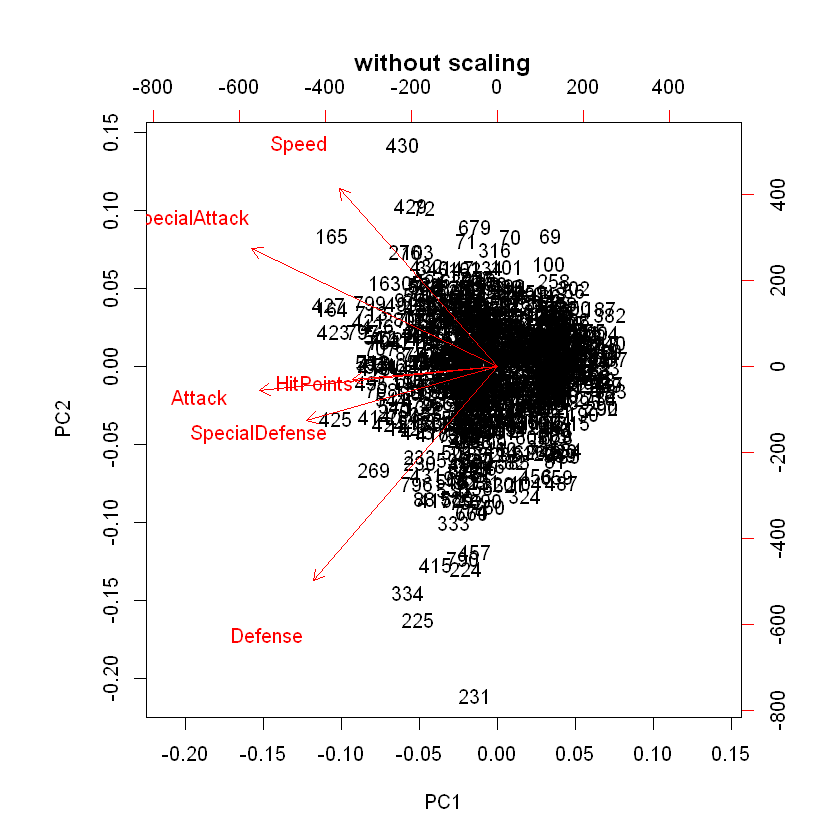

In [10]:
# PCA model with scaling: pr.with.scaling
pr.with.scaling = prcomp(pokemonToAnalysis, scale = TRUE)

# PCA model without scaling: pr.without.scaling
pr.without.scaling = prcomp(pokemonToAnalysis, scale = FALSE)


# Create biplots of both for comparison
biplot(pr.with.scaling, main = "with scaling")
biplot(pr.without.scaling, main = "without scaling")